<a href="https://colab.research.google.com/github/dowonshun/machine_learning/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# 체널 1개 추가
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#데이터 normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
#build CNN 모델
cnn = Sequential()
# 첫번째 convolution 층
cnn.add(Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, activation='relu'))
# 2번째 convolution 층
cnn.add(Conv2D(kernel_size=(3, 3), filters=64, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# 25% 버린다.
cnn.add(Dropout(0.25))
#3차원 tensor를 1차원 vector로 변환
cnn.add(Flatten())
#은닉층
cnn.add(Dense(units=128, activation='relu'))
# 여기도 dropout
cnn.add(Dropout(0.5))
#출력층
cnn.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#compile the model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#train the model시간이 엄청 걸림
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 172s 362ms/step - accuracy: 0.9872 - loss: 0.0471 - val_accuracy: 0.9883 - val_loss: 0.0450
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 196s 350ms/step - accuracy: 0.9882 - loss: 0.0377 - val_accuracy: 0.9903 - val_loss: 0.0447
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 205s 357ms/step - accuracy: 0.9892 - loss: 0.0348 - val_accuracy: 0.9888 - val_loss: 0.0418
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 163s 348ms/step - accuracy: 0.9897 - loss: 0.0339 - val_accuracy: 0.9901 - val_loss: 0.0411
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 164s 351ms/step - accuracy: 0.9896 - loss: 0.0336 - val_accuracy: 0.9884 - val_loss: 0.0452


In [12]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9860 - loss: 0.0529


[0.04517757520079613, 0.9883999824523926]

In [14]:
cnn.evaluate(x_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9980 - loss: 0.0061


[0.005969249177724123, 0.9980000257492065]

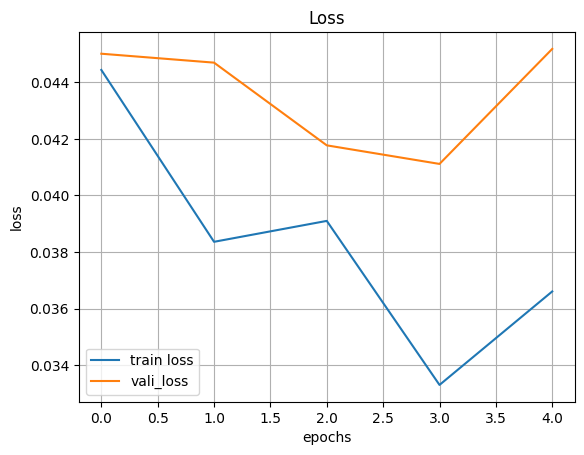

In [17]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='vali_loss')
plt.legend(loc='best')
plt.show()

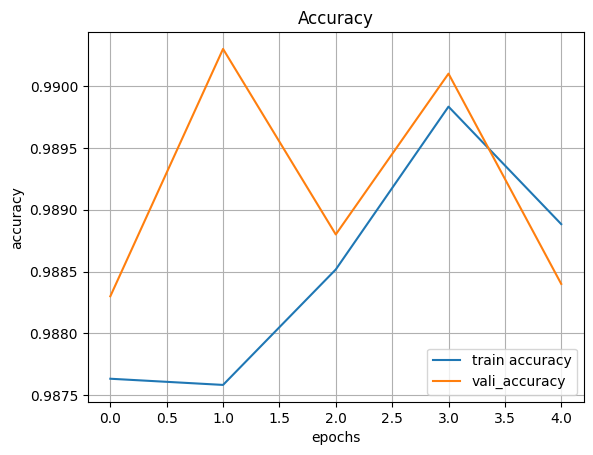

In [18]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='vali_accuracy')

plt.legend(loc='best')
plt.show()